In [31]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px

In [32]:
#Read the CSV file.
Econdata = pd.read_csv("https://raw.githubusercontent.com/boggs2louky/EAP/main/data/ECONDATA.csv")

In [33]:
#Take a initial peek atthe first 5 rows of the dataframe.
Econdata.head()

,DATE,UNRATE,UIBEN,PSAVE,CREDEBT,CPI,LABPART,EMPLVL,UNEMPLOY,NINLAB,CIVPART,POPTHM
0,1/1/1976,7.9,18.3,11.7,205.52079,0.18018018,61.3,87400,7534,59919,61.3,217172
1,2/1/1976,7.7,17.2,12.3,206.70929,0.35971223,61.3,87672,7326,60068,61.3,217315
2,3/1/1976,7.6,17.5,12.2,208.33857,0.17921147,61.3,87985,7230,60091,61.3,217455
3,4/1/1976,7.7,16.7,11.7,210.50006,0.357781753,61.6,88416,7330,59783,61.6,217607
4,5/1/1976,7.4,16,12.3,211.40742,0.713012478,61.5,88794,7053,59918,61.5,217773


In [34]:
#Take a initial peek atthe last 5 rows of the dataframe, notice the hashtags/numeric symbol in the cells.
Econdata.tail()

,DATE,UNRATE,UIBEN,PSAVE,CREDEBT,CPI,LABPART,EMPLVL,UNEMPLOY,NINLAB,CIVPART,POPTHM
557,6/1/2022,3.6,18.1,3,4621.87848,1.373607576,62.2,158111,5912,99812,62.2,333028
558,7/1/2022,3.5,18.7,3.5,4647.98103,-0.011811914,62.1,158290,5670,100051,62.1,333137
559,8/1/2022,3.7,19.1,3.5,4680.22242,#,62.4,158732,6014,99438,62.4,333240
560,9/1/2022,3.5,#,#,#,#,62.3,158936,5753,99667,62.3,#
561,10/1/2022,#,#,#,#,#,#,#,#,#,#,#


In [35]:
#Dropping uneeded columns
Econdata.drop(['UIBEN', 'PSAVE', 'CREDEBT', 'CPI', 'CIVPART'], axis=1, inplace=True)

In [36]:
#Looking at the tail again after dropping the five columns.
Econdata.tail()

,DATE,UNRATE,LABPART,EMPLVL,UNEMPLOY,NINLAB,POPTHM
557,6/1/2022,3.6,62.2,158111,5912,99812,333028
558,7/1/2022,3.5,62.1,158290,5670,100051,333137
559,8/1/2022,3.7,62.4,158732,6014,99438,333240
560,9/1/2022,3.5,62.3,158936,5753,99667,#
561,10/1/2022,#,#,#,#,#,#


In [37]:
#removing/cleaning the data. I want to remove the '#' in that row and replace with zero's
Econdata.loc[561]

DATE        10/1/2022
UNRATE              #
LABPART             #
EMPLVL              #
UNEMPLOY            #
NINLAB              #
POPTHM              #
Name: 561, dtype: object

In [38]:
#This replaces the row 561 having #'s in their repective column with 0's in their place.
Econdata = Econdata.replace(to_replace='#', value='0')
Econdata.tail()

,DATE,UNRATE,LABPART,EMPLVL,UNEMPLOY,NINLAB,POPTHM
557,6/1/2022,3.6,62.2,158111,5912,99812,333028
558,7/1/2022,3.5,62.1,158290,5670,100051,333137
559,8/1/2022,3.7,62.4,158732,6014,99438,333240
560,9/1/2022,3.5,62.3,158936,5753,99667,0
561,10/1/2022,0,0,0,0,0,0


In [39]:
# No value for Total Population in the month of Sept, resulted in removing that row as well.
Econdata.drop(561)

,DATE,UNRATE,LABPART,EMPLVL,UNEMPLOY,NINLAB,POPTHM
0,1/1/1976,7.9,61.3,87400,7534,59919,217172
1,2/1/1976,7.7,61.3,87672,7326,60068,217315
2,3/1/1976,7.6,61.3,87985,7230,60091,217455
3,4/1/1976,7.7,61.6,88416,7330,59783,217607
4,5/1/1976,7.4,61.5,88794,7053,59918,217773
...,...,...,...,...,...,...,...
556,5/1/2022,3.6,62.3,158426,5950,99302,332928
557,6/1/2022,3.6,62.2,158111,5912,99812,333028
558,7/1/2022,3.5,62.1,158290,5670,100051,333137
559,8/1/2022,3.7,62.4,158732,6014,99438,333240


In [40]:
#Lets drop row 560 and 561 all together from the Dataframe.
Econdata.drop(Econdata.index[560:562], axis=0, inplace=True)
Econdata

,DATE,UNRATE,LABPART,EMPLVL,UNEMPLOY,NINLAB,POPTHM
0,1/1/1976,7.9,61.3,87400,7534,59919,217172
1,2/1/1976,7.7,61.3,87672,7326,60068,217315
2,3/1/1976,7.6,61.3,87985,7230,60091,217455
3,4/1/1976,7.7,61.6,88416,7330,59783,217607
4,5/1/1976,7.4,61.5,88794,7053,59918,217773
...,...,...,...,...,...,...,...
555,4/1/2022,3.6,62.2,158105,5941,99513,332863
556,5/1/2022,3.6,62.3,158426,5950,99302,332928
557,6/1/2022,3.6,62.2,158111,5912,99812,333028
558,7/1/2022,3.5,62.1,158290,5670,100051,333137


In [41]:
#Add to two new Columns to store our Unemployment Rate calculation and Labor Force Participation Rate (values are zero, used to take place of calculation values prior Unemployment Rate/Labor Force Participation Rate Calculations.)
#Econdata = pd.DataFrame(Econdata)
#Econdata['UNEMPLYRT'] = '0'
#Econdata['LBFRCPRT'] = '0'
#del Econdata[('UNEMPLYRT', 'LBFRCPRT')] error on my part for a concatenated column#
#Econdata

In [42]:
#Selected a random column (series) within the DataFrame to determine the total number of rows that exist.
Econdata['LABPART'].describe(include='all')

count      560
unique      63
top       66.1
freq        29
Name: LABPART, dtype: object

In [43]:
#Changing the dtypes for each column for the purpose of calculating the data into the respective coluns for Unemployment Rate (UNEMPLYRT) and Labor Force Participation Rate (LBFRCPRT).
Econdata.dtypes

DATE        object
UNRATE      object
LABPART     object
EMPLVL      object
UNEMPLOY    object
NINLAB      object
POPTHM      object
dtype: object

In [44]:
#Changing the 'DATE' Series dtype from Object to a datetime64[ns])
Econdata = pd.DataFrame(Econdata) 
Econdata['DATE'] = Econdata['DATE'].astype('datetime64')
Econdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      560 non-null    datetime64[ns]
 1   UNRATE    560 non-null    object        
 2   LABPART   560 non-null    object        
 3   EMPLVL    560 non-null    object        
 4   UNEMPLOY  560 non-null    object        
 5   NINLAB    560 non-null    object        
 6   POPTHM    560 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 30.8+ KB


In [45]:
#Changing the remaning Columns to their needed dtypes for calculation purposes.
Econdata['EMPLVL'] = Econdata['EMPLVL'].astype('int64')
Econdata['UNEMPLOY'] = Econdata['UNEMPLOY'].astype('int64')
Econdata['NINLAB'] = Econdata['NINLAB'].astype('int64')
Econdata['POPTHM'] = Econdata['POPTHM'].astype('int64')
#Econdata['UNEMPLYRT'] = Econdata['UNEMPLYRT'].astype('float64')
#Econdata['LBFRCPRT'] = Econdata['LBFRCPRT'].astype('float64')
Econdata

,DATE,UNRATE,LABPART,EMPLVL,UNEMPLOY,NINLAB,POPTHM
0,1976-01-01,7.9,61.3,87400,7534,59919,217172
1,1976-02-01,7.7,61.3,87672,7326,60068,217315
2,1976-03-01,7.6,61.3,87985,7230,60091,217455
3,1976-04-01,7.7,61.6,88416,7330,59783,217607
4,1976-05-01,7.4,61.5,88794,7053,59918,217773
...,...,...,...,...,...,...,...
555,2022-04-01,3.6,62.2,158105,5941,99513,332863
556,2022-05-01,3.6,62.3,158426,5950,99302,332928
557,2022-06-01,3.6,62.2,158111,5912,99812,333028
558,2022-07-01,3.5,62.1,158290,5670,100051,333137


In [46]:
Econdata.describe()

,EMPLVL,UNEMPLOY,NINLAB,POPTHM
count,560.000000,560.000000,560.000000,560.000000
mean,128053.603571,8381.905357,74196.226786,277510.985714
std,19538.848691,2422.273400,13084.534715,36502.860355
min,87400.000000,5481.000000,59224.000000,217172.000000
25%,113020.000000,6748.750000,62887.250000,243280.750000
50%,133169.000000,7789.500000,68305.000000,278721.500000
75%,143730.500000,8942.000000,85290.250000,311066.000000
max,158866.000000,23038.000000,103538.000000,333240.000000


In [47]:
#Calculate the Unemployment Rate (UNEMPLYRT) based on the following: # of Unemployed (UNEMPLOY) / # in Labor Force (EMPLVL) * 100.
Econdata['UNEMPLYRT'] = (Econdata['UNEMPLOY'] / Econdata['EMPLVL']) * 100
Econdata

,DATE,UNRATE,LABPART,EMPLVL,UNEMPLOY,NINLAB,POPTHM,UNEMPLYRT
0,1976-01-01,7.9,61.3,87400,7534,59919,217172,8.620137
1,1976-02-01,7.7,61.3,87672,7326,60068,217315,8.356146
2,1976-03-01,7.6,61.3,87985,7230,60091,217455,8.217310
3,1976-04-01,7.7,61.6,88416,7330,59783,217607,8.290355
4,1976-05-01,7.4,61.5,88794,7053,59918,217773,7.943104
...,...,...,...,...,...,...,...,...
555,2022-04-01,3.6,62.2,158105,5941,99513,332863,3.757629
556,2022-05-01,3.6,62.3,158426,5950,99302,332928,3.755697
557,2022-06-01,3.6,62.2,158111,5912,99812,333028,3.739145
558,2022-07-01,3.5,62.1,158290,5670,100051,333137,3.582033


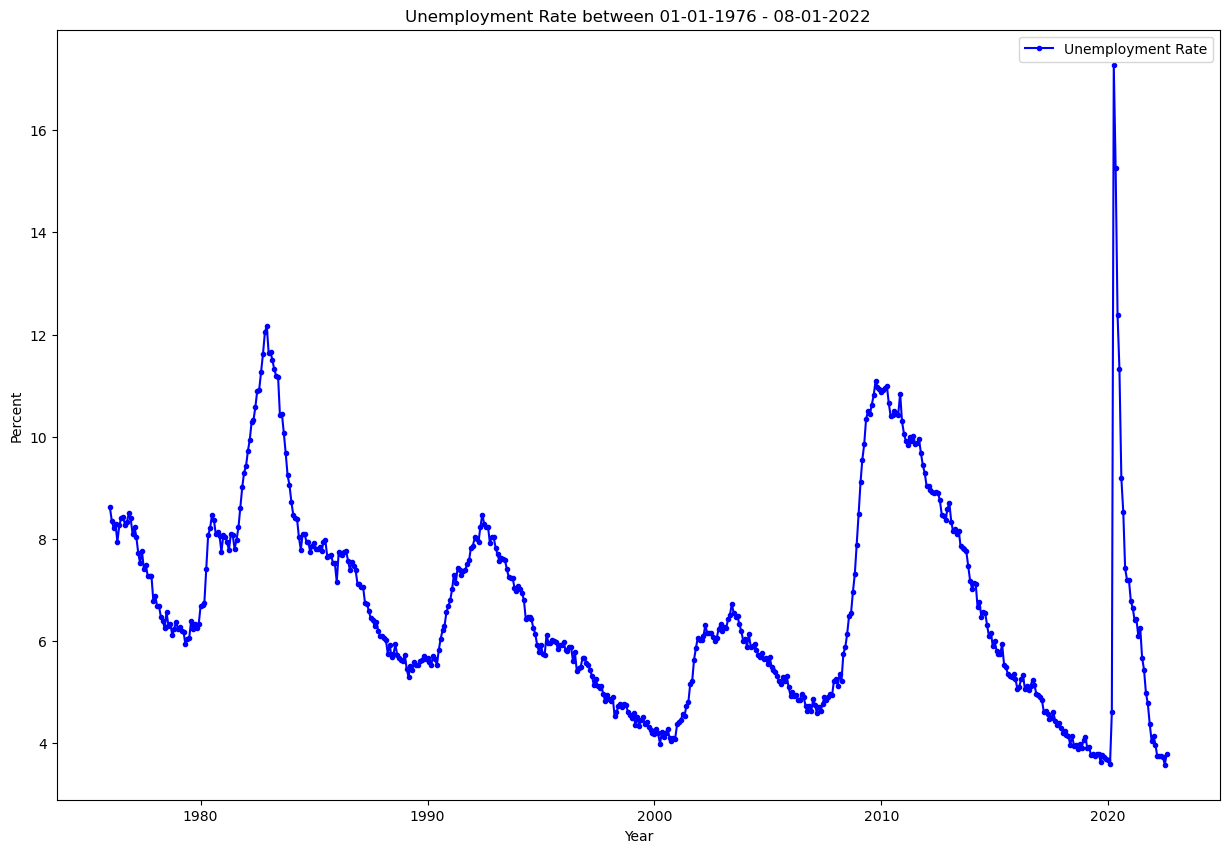

In [48]:
# Plot of Unemployment Rate between the years of 01-01-1976 - 08-01-2022.
plt.figure(figsize=(15,10))

plt.plot(Econdata.DATE, Econdata.UNEMPLYRT, 'b.-', label='Unemployment Rate')


plt.title('Unemployment Rate between 01-01-1976 - 08-01-2022')
plt.ylabel('Percent')
plt.xlabel('Year')
plt.legend()

#plt.xticks(Econdata.DATE[::3].tolist()+[2022])

plt.show()

In [49]:
# The mean of the unemployment rate for the time period between 01-01-1976 - 08-01-2022.
Econdata['UNEMPLYRT'].mean()
#The output below (6.68%) shows that approximately 6.68% of the population was unemployed throughtout the time period as stated above.
#The Federal Reserve has stated that unemployment rates of between 4.0% - 5.0% are acceptable levels. However, remember this is just a mean of unemployment rate based (monthly) for the respective time period.
#Basically, on average for that the selected time period unemployment would have been above acceptable levels based on the Federal Reserve range. Time series can be misleading especially when dealing with means/averages.

6.675843737750175

In [50]:
#Calculate the Labor Force Participation Rate (LBFRCPRT) based on the following: # in Labor Force (EMPLVL) / Total Population (POPTHM) * 100.
Econdata['LBFRCPRT'] = (Econdata['EMPLVL'] / Econdata['POPTHM']) * 100
Econdata

,DATE,UNRATE,LABPART,EMPLVL,UNEMPLOY,NINLAB,POPTHM,UNEMPLYRT,LBFRCPRT
0,1976-01-01,7.9,61.3,87400,7534,59919,217172,8.620137,40.244599
1,1976-02-01,7.7,61.3,87672,7326,60068,217315,8.356146,40.343280
2,1976-03-01,7.6,61.3,87985,7230,60091,217455,8.217310,40.461245
3,1976-04-01,7.7,61.6,88416,7330,59783,217607,8.290355,40.631046
4,1976-05-01,7.4,61.5,88794,7053,59918,217773,7.943104,40.773650
...,...,...,...,...,...,...,...,...,...
555,2022-04-01,3.6,62.2,158105,5941,99513,332863,3.757629,47.498520
556,2022-05-01,3.6,62.3,158426,5950,99302,332928,3.755697,47.585664
557,2022-06-01,3.6,62.2,158111,5912,99812,333028,3.739145,47.476789
558,2022-07-01,3.5,62.1,158290,5670,100051,333137,3.582033,47.514986


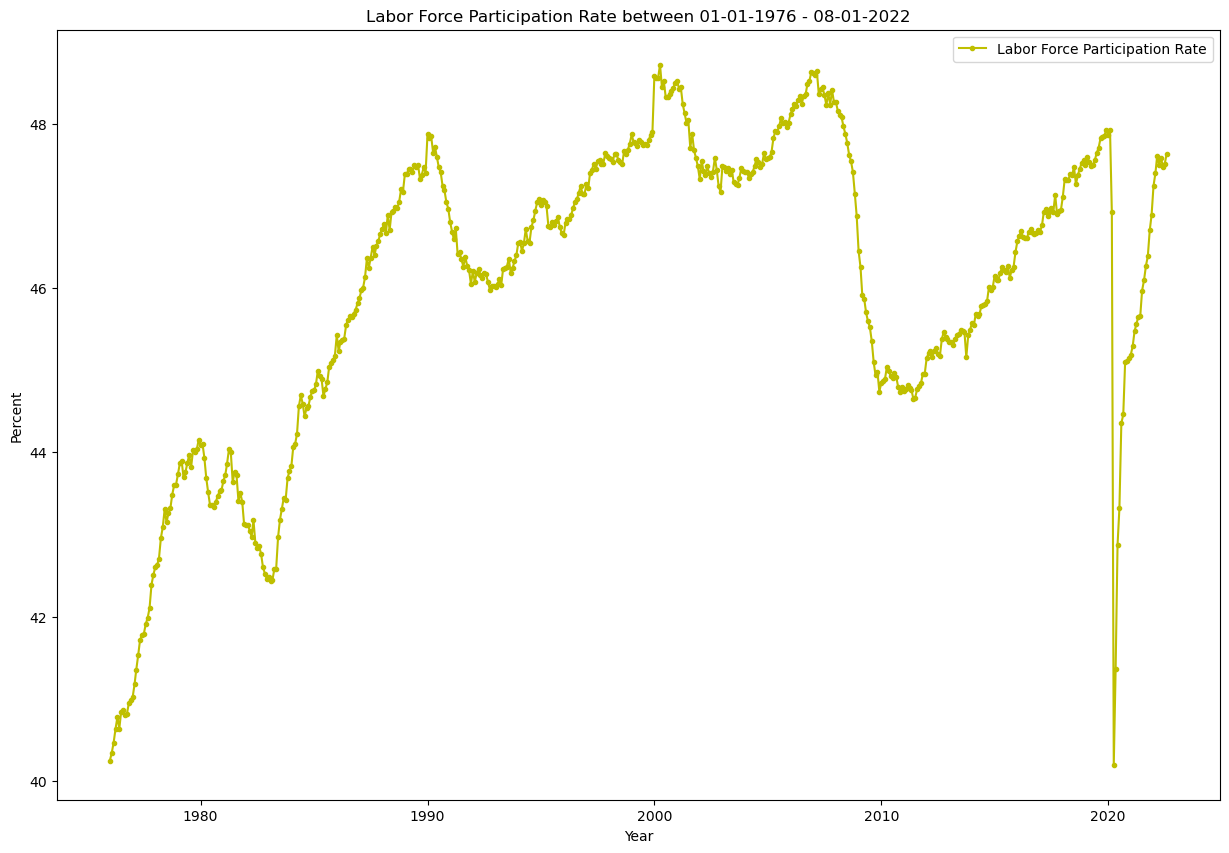

In [51]:
# Plot of Labor Force Participation Rate between the years of 01-01-1976 - 08-01-2022.
plt.figure(figsize=(15,10))

plt.plot(Econdata.DATE, Econdata.LBFRCPRT, 'y.-', label='Labor Force Participation Rate')


plt.title('Labor Force Participation Rate between 01-01-1976 - 08-01-2022')
plt.ylabel('Percent')
plt.xlabel('Year')
plt.legend()

#plt.xticks(Econdata.DATE[::3].tolist()+[2022])

plt.show()

In [52]:
# The mean of the Labor Force Participation rate for the time period between 01-01-1976 - 08-01-2022.
Econdata['LBFRCPRT'].mean()
# The Labor Force Participation Rate is on average 46.02% which excludes shifts in age cohorts when calculated here. More meaningful rates are calculated based on age cohorts which has not been performed here, providing greater insight at given time intervals.
# However, it is amazing to think that on average between 01-01-1976 - 08-01-2022 that almost 46% of the workforce was actively employed, meaning "Merica" is a very laborious country!

46.0189219295556

In [53]:
#Calculate the percent of persons Not in Labor Force (NILBRFRCRT) as a percent of total population = # of persons Not in Labor Force (NINLAB) / total population (POPTHM) * 100.
Econdata['NILBRFRCRT'] = (Econdata['NINLAB'] / Econdata['POPTHM']) * 100
Econdata

,DATE,UNRATE,LABPART,EMPLVL,UNEMPLOY,NINLAB,POPTHM,UNEMPLYRT,LBFRCPRT,NILBRFRCRT
0,1976-01-01,7.9,61.3,87400,7534,59919,217172,8.620137,40.244599,27.590573
1,1976-02-01,7.7,61.3,87672,7326,60068,217315,8.356146,40.343280,27.640982
2,1976-03-01,7.6,61.3,87985,7230,60091,217455,8.217310,40.461245,27.633763
3,1976-04-01,7.7,61.6,88416,7330,59783,217607,8.290355,40.631046,27.472921
4,1976-05-01,7.4,61.5,88794,7053,59918,217773,7.943104,40.773650,27.513971
...,...,...,...,...,...,...,...,...,...,...
555,2022-04-01,3.6,62.2,158105,5941,99513,332863,3.757629,47.498520,29.896083
556,2022-05-01,3.6,62.3,158426,5950,99302,332928,3.755697,47.585664,29.826869
557,2022-06-01,3.6,62.2,158111,5912,99812,333028,3.739145,47.476789,29.971053
558,2022-07-01,3.5,62.1,158290,5670,100051,333137,3.582033,47.514986,30.032989


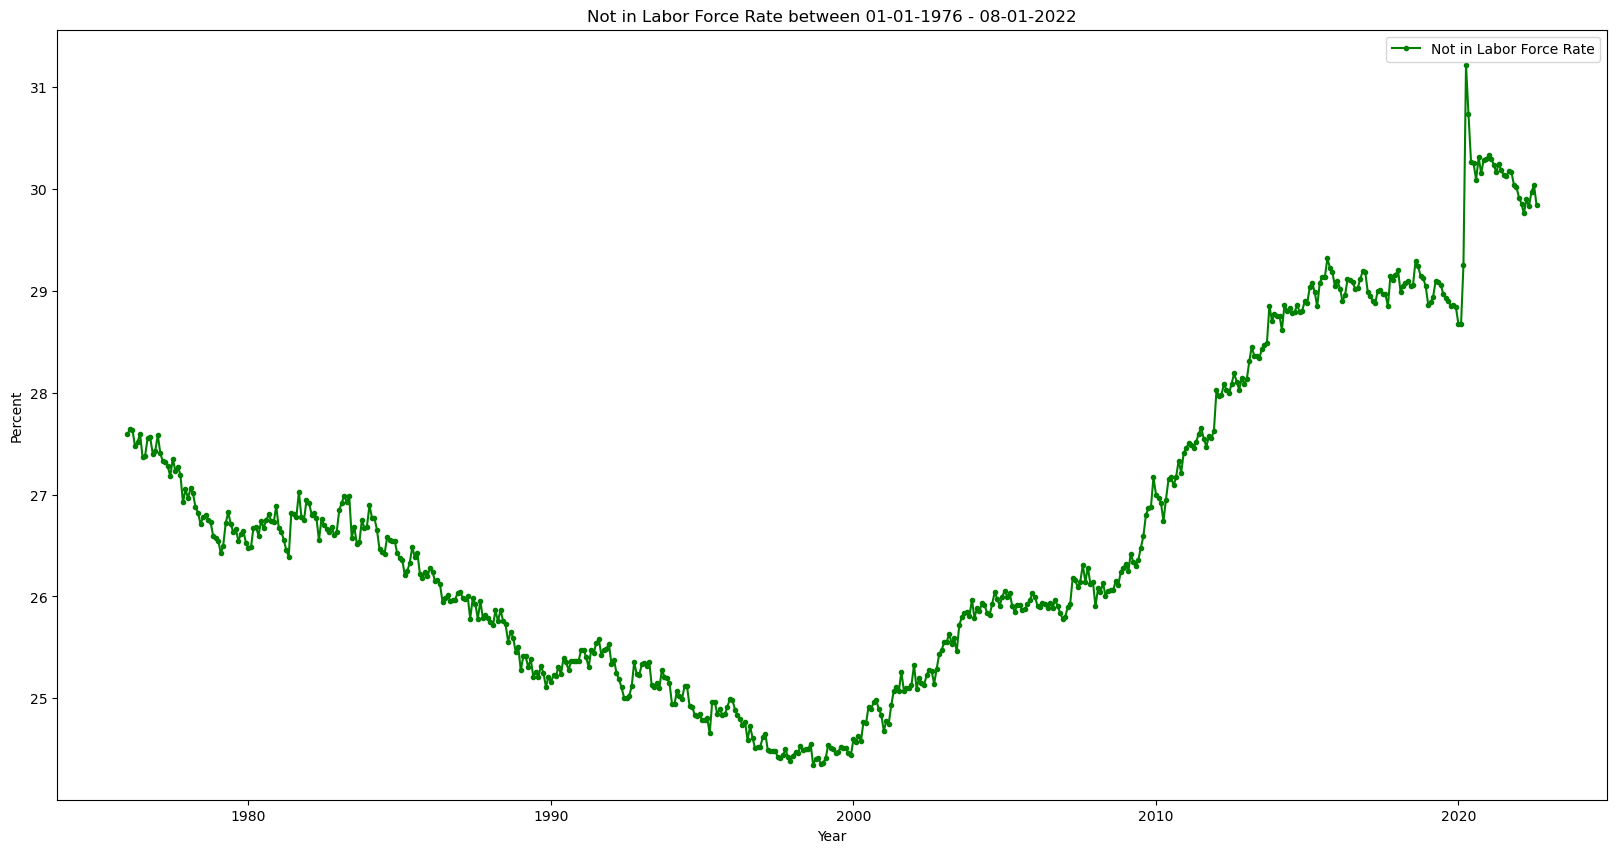

In [54]:
# Plot of Not in Labor Force Rate between the years of 01-01-1976 - 08-01-2022.
plt.figure(figsize=(20,10))

plt.plot(Econdata.DATE, Econdata.NILBRFRCRT, 'g.-', label='Not in Labor Force Rate')


plt.title('Not in Labor Force Rate between 01-01-1976 - 08-01-2022')
plt.ylabel('Percent')
plt.xlabel('Year')
plt.legend()

#plt.xticks(Econdata.DATE[::3].tolist()+[2022])

plt.show()

In [55]:
# The mean of the Not in Labor Force Rate (NILBRFRCRT) for the time period between 01-01-1976 - 08-01-2022.
Econdata['NILBRFRCRT'].mean()
# The Not in Labor Force Rate mean as define below (26.63%) is not far from 30%. The percent slightly below 30% means that approximately 1/3 of the population between 01-01-1976 - 08-01-2022 was not in the Labor Force!

26.625296611609098

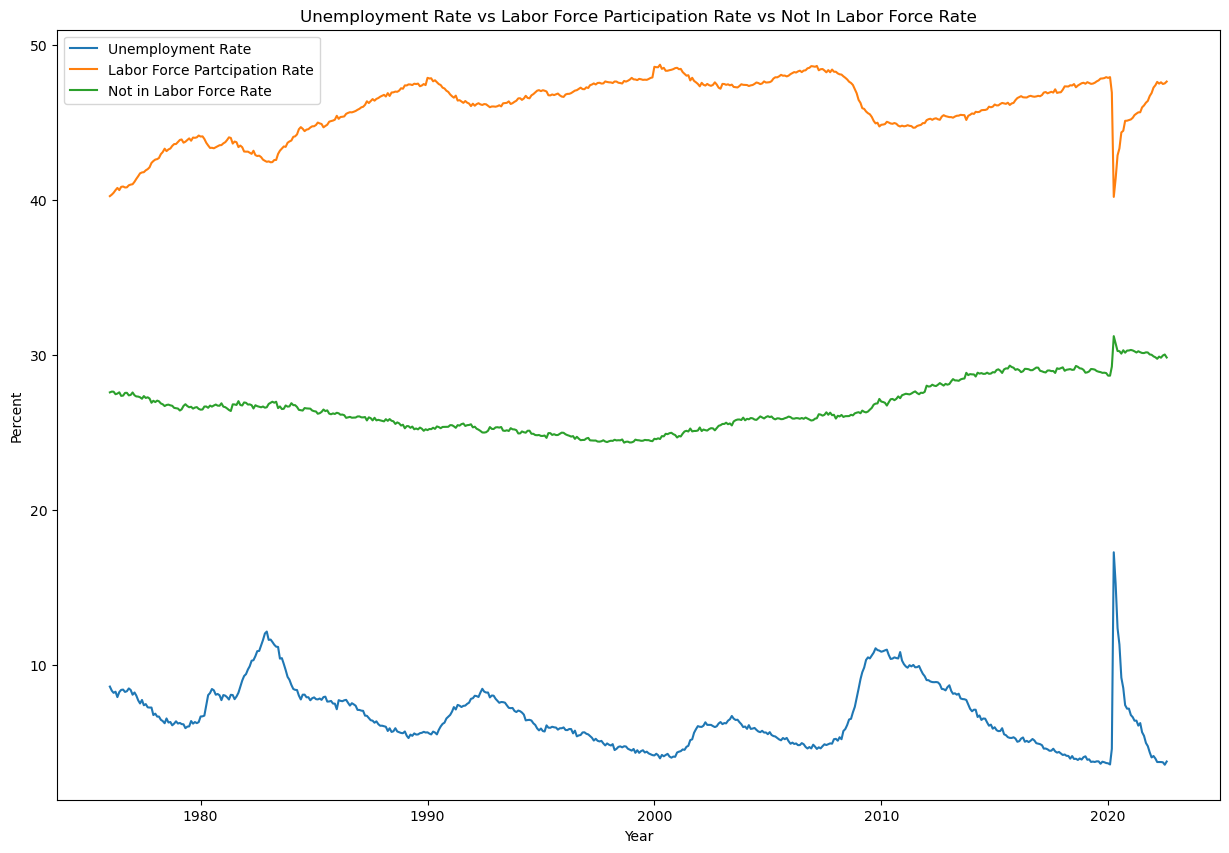

In [56]:
# Plot of Unemployment Rate/Labor Force Rate/Not in Labor Force Rate between the years of 01-01-1976 - 08-01-2022.
plt.figure(figsize=(15,10))

plt.plot(Econdata.DATE, Econdata.UNEMPLYRT, label='Unemployment Rate')
plt.plot(Econdata.DATE, Econdata.LBFRCPRT, label='Labor Force Partcipation Rate')
plt.plot(Econdata.DATE, Econdata.NILBRFRCRT, label='Not in Labor Force Rate')

plt.title('Unemployment Rate vs Labor Force Participation Rate vs Not In Labor Force Rate')
plt.ylabel('Percent')
plt.xlabel('Year')
plt.legend()

plt.show()